In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
xdata = np.linspace(0, 10, 11)

def func(x):
    noise = np.random.uniform(-0.2 * x*x , 0.2 * x*x )
    return x*x + noise

ydata= func(xdata)  

In [4]:
def q2(x, a,b,c):
    return a*x*x+b*x+c;

scipy.optimize.curve_fit() return two values.
- popt is the optimal set of the function arguments
- pcov is the covariance matrix (協方差矩陣)。Extracts the diagonal elements from the pcov matrix, which represent the variance of each parameter. Taking the square root of these variances gives the standard error.

In [8]:
popt, pcov = curve_fit(q2, xdata, ydata)

# 提取標準誤差
perr = np.sqrt(np.diag(pcov))

print("Optimal parameters:", popt)
print("Standard errors:", perr)

# 計算預測值
ypred = q2(xdata, *popt)

# 計算 MSE
mse = np.mean((ydata - ypred)**2)

print("Mean Squared Error:", mse)

Optimal parameters: [ 1.00243892  0.69876041 -1.61625703]
Standard errors: [0.14356065 1.49054412 3.20368758]
Mean Squared Error: 12.860432459280423


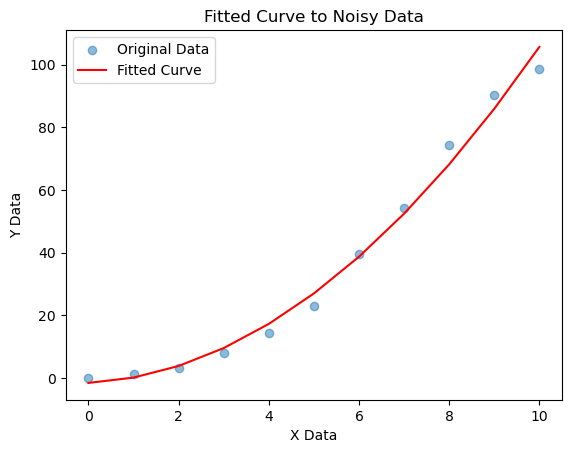

In [9]:
plt.scatter(xdata, ydata, label='Original Data', alpha=0.5)
plt.plot(xdata, q2(xdata, *popt), color='red', label='Fitted Curve')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.legend()
plt.title('Fitted Curve to Noisy Data')
plt.show()